### First, we find the days with less than two contributions

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
contributions = pd.read_csv('contributions.csv')
contributions["Day"]=pd.to_datetime(contributions["Day"],format='%Y-%m-%d')

In [47]:
contributions

,Day,Total
0,2018-02-27,5
1,2018-02-28,2
2,2018-03-03,2
3,2018-03-04,2
4,2018-03-07,1
...,...,...
743,2020-10-31,2
744,2020-11-02,1
745,2020-11-03,4
746,2020-11-08,1


In [48]:
day_range = pd.date_range(start=pd.to_datetime(contributions.iloc[0][0],format='%Y-%m-%d'),end=pd.to_datetime(contributions.iloc[-1][0],format='%Y-%m-%d'))

In [83]:
dayInfTwo=[]
for day in day_range:
    s=contributions["Day"].isin([str(day)])
    if(len(s[s].index)==0):
        dayInfTwo.append(str(day)[0:10])
    elif(len(s[s].index)==1):
        nbr=contributions[contributions["Day"]==day]["Total"]
        if(nbr.iloc[0]==1):
            dayInfTwo.append(str(day)[0:10])
dayInfTwo

['2018-03-01',
 '2018-03-02',
 '2018-03-05',
 '2018-03-06',
 '2018-03-07',
 '2018-03-08',
 '2018-03-09',
 '2018-03-10',
 '2018-03-11',
 '2018-03-17',
 '2018-03-18',
 '2018-03-19',
 '2018-03-24',
 '2018-03-25',
 '2018-03-30',
 '2018-03-31',
 '2018-04-05',
 '2018-04-07',
 '2018-04-12',
 '2018-04-13',
 '2018-04-14',
 '2018-04-15',
 '2018-04-17',
 '2018-04-20',
 '2018-04-21',
 '2018-04-22',
 '2018-04-25',
 '2018-04-27',
 '2018-04-29',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-05-06',
 '2018-05-07',
 '2018-05-09',
 '2018-05-10',
 '2018-05-12',
 '2018-05-13',
 '2018-05-27',
 '2018-06-01',
 '2018-06-02',
 '2018-06-03',
 '2018-06-04',
 '2018-06-05',
 '2018-06-06',
 '2018-06-07',
 '2018-06-10',
 '2018-06-12',
 '2018-06-16',
 '2018-06-17',
 '2018-06-18',
 '2018-06-23',
 '2018-06-24',
 '2018-06-25',
 '2018-06-28',
 '2018-06-30',
 '2018-07-01',
 '2018-07-02',
 '2018-07-03',
 '2018-07-08',
 '2018-07-10',
 '2018-07-14',
 '2018-07-15',
 '2018-07-21',
 '2018-07-22',
 '2018-07-

### Then, we plot the activity ~ contributors 

In [84]:
contributors = pd.read_csv('contributors.csv')
contributors

,User_ID,contributions
0,8445,1777
1,810438,1554
2,29597,1439
3,6820,1268
4,63648,852
...,...,...
1601,A1168,1
1602,A1169,1
1603,A1170,1
1604,A1171,1


In [92]:
contributorsByNumb = contributors.groupby(["contributions"]).count().reset_index().rename(columns={'User_ID':'numberUsers'})
contributorsByNumb

,contributions,numberUsers
0,1,1141
1,2,200
2,3,74
3,4,45
4,5,25
5,6,19
6,7,5
7,8,13
8,9,13
9,10,8


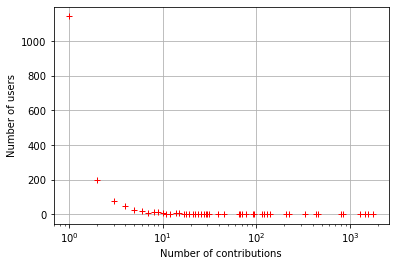

In [100]:
plt.semilogx(contributorsByNumb["contributions"],contributorsByNumb["numberUsers"], 'r+')
plt.xlabel("Number of contributions")
plt.ylabel("Number of users")
plt.grid(True)